In [1]:
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
import os
import pandas as pd
from nltk.tokenize import word_tokenize

import gensim.corpora as corpora
from utils.config import random_sample,seed

In [2]:
import os
import pandas as pd

In [3]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

model_type = "top2vec"
model_name = "Top2Vec"
experiment="embedding"
embedding_model = "all-miniLM-L6-v2"
data_type="np_mini_stopwords"
file_name=f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"
file_name_data = f"{data_type}.csv"

folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"

folder_name = f"Embedding-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)


df = load_from_file(folder_path_data,file_name_data)


data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
df

,text,label,date
0,representanten harald tom nesvik bad ordet nat...,1,2009-06-03
1,selvfølgelig diskusjon timer saken konstatere ...,1,2011-02-16
2,takk svaret svar linjene senterpartiets progra...,0,2007-03-21
3,riktig alternative statsbudsjetter prinsipale ...,0,2004-10-26
4,dagens dagsavisen stortingsrepresentant astrid...,0,2000-11-15
...,...,...,...
3595,slutte representanten tone merete sønsterud fo...,1,2010-06-14
3596,oppfølgingsspørsmål landbruksministeren utanri...,1,2004-03-10
3597,tillater stille statsråden følgende spørsmål s...,0,2009-10-21
3598,fnorganisasjonene indikasjon norge regne øknin...,1,2006-10-05


In [5]:
topic_model = None
try:
    topic_model = Top2Vec.load(file_path)
except:
    print("success")
    topic_model = Top2Vec(documents = new_data, embedding_model="all-MiniLM-L6-v2")

In [6]:
topic_model.save(file_path)

In [7]:
print(topic_model.embedding_model)

all-MiniLM-L6-v2


In [8]:
num_topics = topic_model.get_num_topics()
print(num_topics)

2


In [9]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()

In [10]:
topic_words, word_scores, topic_nums = topic_model.get_topics(num_topics)

In [11]:
topic_word_scores = [dict(zip(topic_words[i][:], word_scores[i])) for i in topic_nums]

In [12]:
topic_model.get_topics()

(array([['spørsmalet', 'løsningen', 'selvfølgelig', 'gjennomføres',
         'gjennomføre', 'medføre', 'lære', 'saksordføreren', 'medfører',
         'utgjør', 'forsøk', 'spørsmal', 'gjennomført', 'innføre',
         'prøve', 'løsninger', 'spør', 'løse', 'aktører', 'tilnærming',
         'løsning', 'prøver', 'ordinære', 'spørsmalene', 'sjølvsagt',
         'møter', 'økte', 'avgjørende', 'kjøre', 'økning', 'støtter',
         'økonomiske', 'militære', 'kontantstøtten', 'møte', 'eøsavtalen',
         'næringslivet', 'lærere', 'næringen', 'gjøres', 'høre', 'søke',
         'øvrig', 'nødvendig', 'skjønner', 'høst', 'lærer', 'øker',
         'innført', 'prosjekter'],
        ['studenter', 'løsningen', 'spørsmalet', 'gjennomføres',
         'medføre', 'løsninger', 'gjennomføre', 'spørsmal', 'utgjør',
         'selvfølgelig', 'medfører', 'studentene', 'spør',
         'saksordføreren', 'møter', 'løsning', 'aktører', 'støtter',
         'spørsmalene', 'økning', 'prøve', 'lære', 'kjøre', 'forsø

In [13]:
for i in range(num_topics):
    print("\n", i)
    print(topic_word_scores[i])



 0
{'spørsmalet': 0.6146953, 'løsningen': 0.6010448, 'selvfølgelig': 0.5950978, 'gjennomføres': 0.58722436, 'gjennomføre': 0.5861701, 'medføre': 0.5826609, 'lære': 0.57553726, 'saksordføreren': 0.57053506, 'medfører': 0.56838596, 'utgjør': 0.5679902, 'forsøk': 0.5665904, 'spørsmal': 0.56571484, 'gjennomført': 0.56537116, 'innføre': 0.56456774, 'prøve': 0.56282127, 'løsninger': 0.5627538, 'spør': 0.56162363, 'løse': 0.56125605, 'aktører': 0.5602292, 'tilnærming': 0.5570625, 'løsning': 0.5569795, 'prøver': 0.5564903, 'ordinære': 0.5563093, 'spørsmalene': 0.5554435, 'sjølvsagt': 0.55328906, 'møter': 0.55245376, 'økte': 0.5513041, 'avgjørende': 0.5512918, 'kjøre': 0.5503302, 'økning': 0.54973334, 'støtter': 0.54900527, 'økonomiske': 0.5456799, 'militære': 0.54395896, 'kontantstøtten': 0.54340965, 'møte': 0.54230154, 'eøsavtalen': 0.5407989, 'næringslivet': 0.5405992, 'lærere': 0.53987694, 'næringen': 0.5397942, 'gjøres': 0.53560114, 'høre': 0.5353262, 'søke': 0.5331771, 'øvrig': 0.5331402

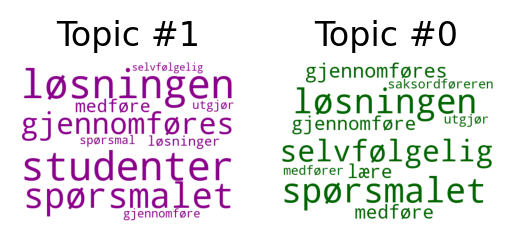

In [14]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(topic_word_scores,num_topics,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

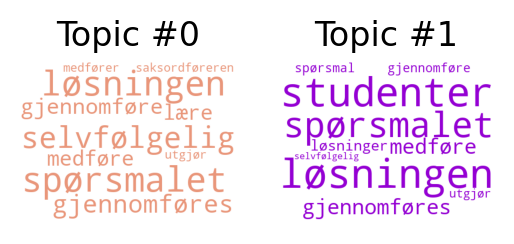

In [15]:


from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(topic_word_scores, f"{model_name}-{embedding_model}: {data_type}",num_topics, dpi=200)


In [16]:
from utils.tables_and_plots import create_wordcloud


wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i])
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [17]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]



write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [18]:
from utils.filemanagement import load_model_topics


loaded_topics = load_model_topics(folder_path_topics, file_name)

In [19]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [20]:
len(loaded_topics.values())

2

In [21]:

from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [22]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [23]:
from utils.stats import compute_metrics
input_data = list(loaded_topics.values())
coherence, diversity = compute_metrics(
    input_data, word_frequencies, word_co_frequencies, 10)

10
('løsningen', 'spørsmalet') wordtuple
('selvfølgelig', 'spørsmalet') wordtuple
('gjennomføres', 'spørsmalet') wordtuple
('gjennomføre', 'spørsmalet') wordtuple
('medføre', 'spørsmalet') wordtuple
('lære', 'spørsmalet') wordtuple
('saksordføreren', 'spørsmalet') wordtuple
('medfører', 'spørsmalet') wordtuple
('spørsmalet', 'utgjør') wordtuple
('løsningen', 'selvfølgelig') wordtuple
('løsningen', 'selvfølgelig') wordup
16.0 over
31076.0 under
-10.92351319630841 -4.0 2.7308782990771023 ('løsningen', 'selvfølgelig') 16 68 457
('gjennomføres', 'løsningen') wordtuple
('gjennomføres', 'løsningen') wordup
('gjennomføre', 'løsningen') wordtuple
('gjennomføre', 'løsningen') wordup
4.0 over
11832.0 under
-11.530406337099068 -2.0 5.765203168549534 ('gjennomføre', 'løsningen') 4 68 174
('løsningen', 'medføre') wordtuple
('løsningen', 'medføre') wordup
('lære', 'løsningen') wordtuple
('lære', 'løsningen') wordup
('løsningen', 'saksordføreren') wordtuple
('løsningen', 'saksordføreren') wordup
3.0 

In [24]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.28276741223359747


In [25]:
diversity

0.65

In [26]:
coherence

1.9534698164438304

In [27]:
from tabulate import tabulate
import csv

In [28]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒════════════════════════════════════════════╤═══════════╤═════════╕
│ Model                                      │ Metric    │   Value │
╞════════════════════════════════════════════╪═══════════╪═════════╡
│ top2vec_all-miniLM-L6-v2_np_mini_stopwords │ coherence │ 1.95347 │
├────────────────────────────────────────────┼───────────┼─────────┤
│ top2vec_all-miniLM-L6-v2_np_mini_stopwords │ diversity │ 0.65    │
╘════════════════════════════════════════════╧═══════════╧═════════╛


In [29]:
# Save all topic stats to file

topic_stats_folder_path = fr"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})